1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=4)

In [3]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print('MinMaxScaled Test score: {:.4f}'.format(clf.score(X_test_scaled, y_test)))

MinMaxScaled Test score: 0.9860


2) Repeat Step 1 using pipelines and report the score.



In [5]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=3))
pipe.fit(X_train,y_train)
print('Train score: {:.4f}'.format(pipe.score(X_train, y_train)))
print('Test score: {:.4f}'.format(pipe.score(X_test, y_test)))


Train score: 0.9812
Test score: 0.9860


3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor.



In [7]:
from sklearn.model_selection import GridSearchCV
Neigh_pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,30,2)}
grid = GridSearchCV(Neigh_pipe, param_grid, cv=10,return_train_score=True)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.962
best parameters: {'kneighborsclassifier__n_neighbors': 7}
test-set score: 0.993


4) Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.



In [8]:
import pandas as pd
data = pd.read_csv('bike_day_raw.csv')
data.head()


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [9]:
X = data.drop('cnt',axis=1)

In [10]:
y=data.iloc[:,10]

In [11]:
data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [14]:
data.dtypes
X.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

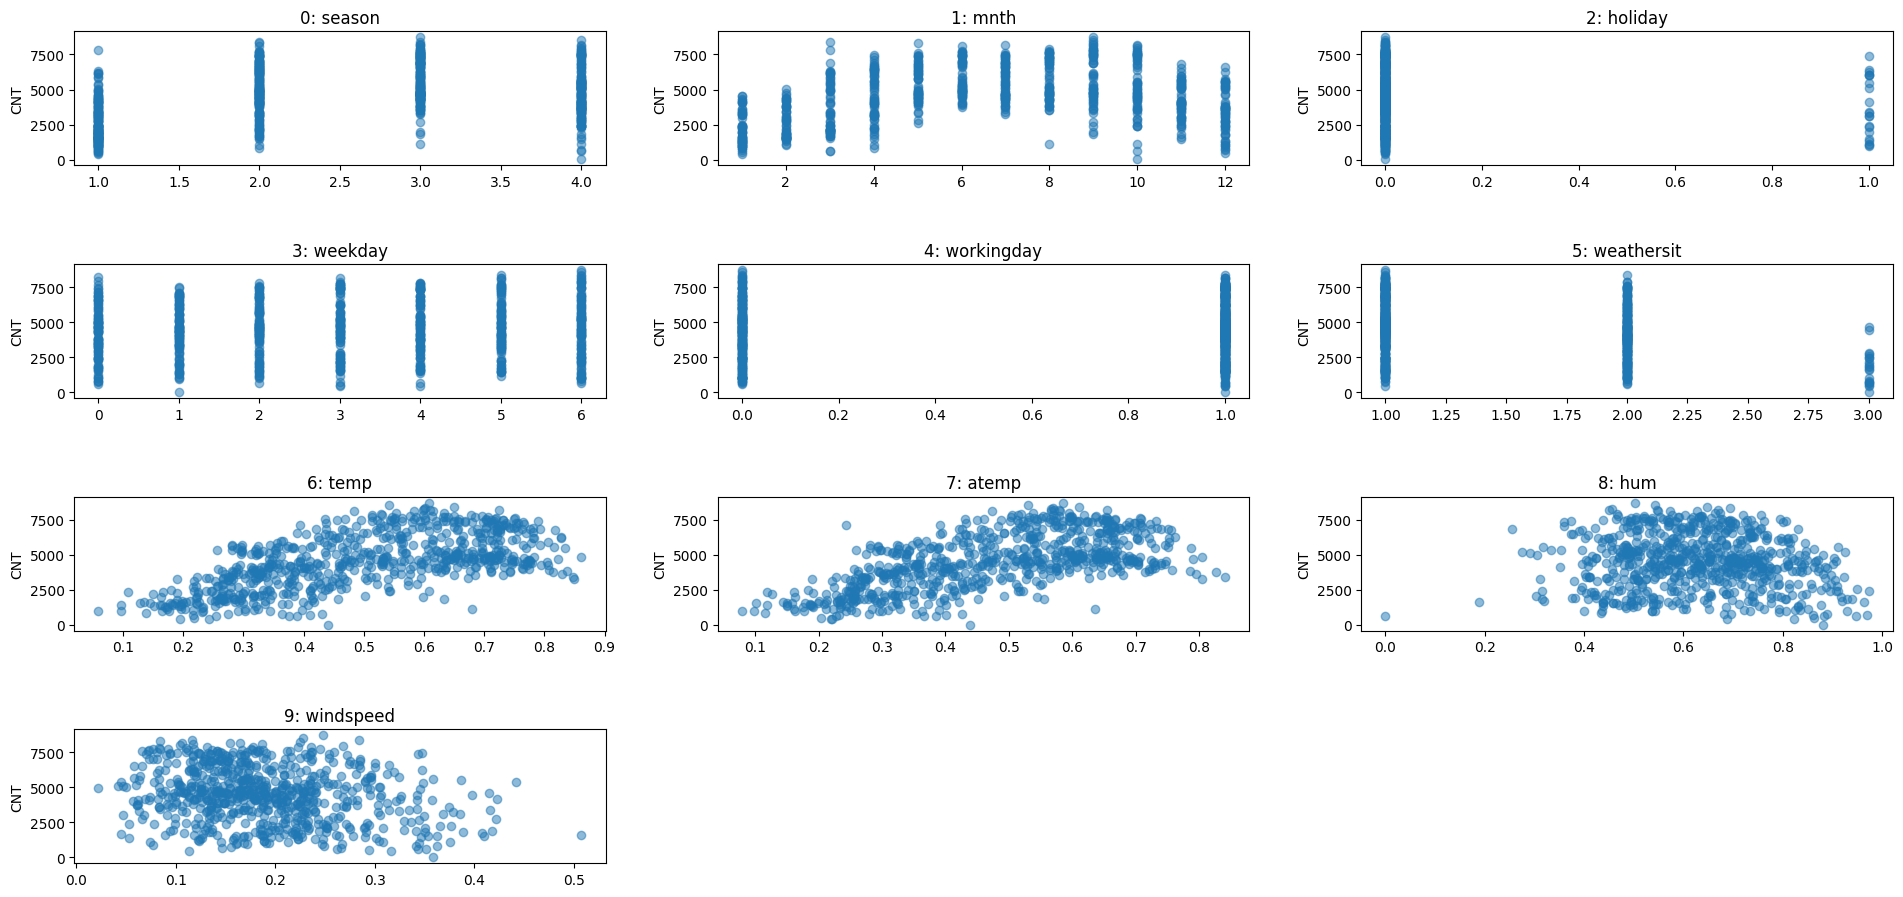

In [15]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 3, figsize=(20, 10))
fig.tight_layout(pad=5.0)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    ax.plot(X.iloc[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("CNT")

In [16]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
data.shape

(731, 11)

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
numerical_features = X.dtypes == 'float'
categorical_features = X.dtypes != 'float'

In [19]:
preprocess1 = make_column_transformer((make_pipeline(SimpleImputer(), StandardScaler()), numerical_features),
                                     (OneHotEncoder(categories='auto'), categorical_features))

In [20]:
model1 = make_pipeline(preprocess1, KNeighborsRegressor())

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=132)
model1.fit(X_train, y_train)
print("KNeighborsRegressor regression score: %f" % model1.score(X_test, y_test))

KNeighborsRegressor regression score: 0.537128


In [22]:
data.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [24]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
model2 = Pipeline(steps=[('preprocessor2', preprocessor2),
                      ('regressor', KNeighborsRegressor())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model2.fit(X_train, y_train)
print("model score: %.3f" % model2.score(X_test, y_test))

model score: 0.473
